# Gün-1

In [ ]:
!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud #bir metindeki kelimeleri sıklıklarına göre görselleştirerek bulut şeklinde gösterir.
import os
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import cosine_similarity


nltk.download('punkt') #tokenizer ındırmek ıcın gereklı
nltk.download('stopwords') #
nltk.download('wordnet') #lemmatization islemı ııcn ındırılen bır kutuphanedır. 

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\melis\anaconda3\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\melis\anaconda3\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\melis\anaconda3\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [258]:
"""def create_dataset(articles_root, summaries_root):
    """
    articles_root: News Articles ana klasörü
    summaries_root: Summaries ana klasörü
    """
    data = []
    for folder_name in os.listdir(articles_root):
        #print(folder_name) business,entertainment,politics,sport,tech
        articles_path = os.path.join(articles_root, folder_name)
        summaries_path = os.path.join(summaries_root, folder_name)
        
        if os.path.isdir(articles_path) and os.path.isdir(summaries_path):
            for file_name in os.listdir(articles_path):
                
                if file_name.endswith(".txt"):
                    file_id = file_name.split(".")[0]
                    article_file = os.path.join(articles_path, file_name)
                    summary_file = os.path.join(summaries_path, file_name)
                    
                    # Dosyaları oku
                    with open(article_file, "r") as f:
                        article_text = f.read()
                    with open(summary_file, "r") as f:
                        summary_text = f.read()
                    
                    data.append({
                        "folder": folder_name,
                        "id": file_id,
                        "article": article_text,
                        "summary": summary_text
                    })
    
    return pd.DataFrame(data)

articles_root = r"C:\Users\melis\OneDrive\Masaüstü\My_Pacific_Technology_internship_project\PaTek_SECOND10DAY\dataset\News Articles"
summaries_root = r"C:\Users\melis\OneDrive\Masaüstü\My_Pacific_Technology_internship_project\PaTek_SECOND10DAY\dataset\Summaries"

df = create_dataset(articles_root, summaries_root)
df.head()


,folder,id,article,summary
0,business,001,Ad sales boost Time Warner profit\n\nQuarterly...,TimeWarner said fourth quarter sales rose 2% t...
1,business,002,Dollar gains on Greenspan speech\n\nThe dollar...,The dollar has hit its highest level against t...
2,business,003,Yukos unit buyer faces loan claim\n\nThe owner...,Yukos' owner Menatep Group says it will ask Ro...
3,business,004,High fuel prices hit BA's profits\n\nBritish A...,"Rod Eddington, BA's chief executive, said the ..."
4,business,005,Pernod takeover talk lifts Domecq\n\nShares in...,Pernod has reduced the debt it took on to fund...


In [259]:
"""df.to_csv("dataframe.csv", index=False, encoding="utf-8")

In [3]:
df=pd.read_csv("dataframe.csv")
dataframe= df.copy()
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   folder   2225 non-null   object
 1   id       2225 non-null   int64 
 2   article  2225 non-null   object
 3   summary  2225 non-null   object
dtypes: int64(1), object(3)
memory usage: 69.7+ KB


In [518]:
dataframe.article ##burada ozel karakterler kullanımı / veya\ kullanımı coklukta o yuzden temızlık yapmalıyız

0       Ad sales boost Time Warner profit\n\nQuarterly...
1       Dollar gains on Greenspan speech\n\nThe dollar...
2       Yukos unit buyer faces loan claim\n\nThe owner...
3       High fuel prices hit BA's profits\n\nBritish A...
4       Pernod takeover talk lifts Domecq\n\nShares in...
                              ...                        
2220    BT program to beat dialler scams\n\nBT is intr...
2221    Spam e-mails tempt net shoppers\n\nComputer us...
2222    Be careful how you code\n\nA new European dire...
2223    US cyber security chief resigns\n\nThe man mak...
2224    Losing yourself in online gaming\n\nOnline rol...
Name: article, Length: 2225, dtype: object

In [520]:
df.summary

0       TimeWarner said fourth quarter sales rose 2% t...
1       The dollar has hit its highest level against t...
2       Yukos' owner Menatep Group says it will ask Ro...
3       Rod Eddington, BA's chief executive, said the ...
4       Pernod has reduced the debt it took on to fund...
                              ...                        
2220    BT is introducing two initiatives to help beat...
2221    A third of them read unsolicited junk e-mail a...
2222    This goes to the heart of the European project...
2223    Amit Yoran was director of the National Cyber ...
2224    He says that in the world of online gaming suc...
Name: summary, Length: 2225, dtype: object

# Gün-2

In [522]:
class TextCleaning:
    def __init__(self,language="english"):
        self.language= language
        self.stopwords = set(stopwords.words(language))
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()


    import string
    def clean_text(self, text):
        text = text.lower()
        # HTML, URL, e-posta temizliği
        text = re.sub(r"<.*?>", "", text)
        text = re.sub(r"https?://\S+", "", text)
        text = re.sub(r"\S+@\S+", "", text)
        text = re.sub(r"[^\w\s.,!?;:]", "", text)
        tokens = text.split()
        cleaned_tokens = []
        
        for t in tokens:
            # rakam + nokta (ondalık) + harf kombinasyonlarını da sil
            if re.match(r'^\d+(\.\d+)?[a-zA-Z]+$', t):
                continue
            # Sadece rakamları veya sadece harfleri koru
            elif t.isalpha() or t.isdigit():
                cleaned_tokens.append(t)
            # Noktalama işaretlerini koru
            elif all(char in string.punctuation for char in t):
                cleaned_tokens.append(t)
            # Diğer karmaşaları at
            else:
                cleaned_tokens.append(t)
        
        cleaned_text = ' '.join(cleaned_tokens)
        return cleaned_text


    def sentence_token(self,text):
        return sent_tokenize(text)

    def words_token(self,text):
        words= word_tokenize(text)
        words_without_punc= []
        for word in words:
            if word not in string.punctuation:
                words_without_punc.append(word)
        return words_without_punc

    def remove_stopwords(self,words):
        not_stopwords=[]
        for word in words:
            if word.lower() not in self.stopwords:
                not_stopwords.append(word)
        return not_stopwords

    def stem_words(self,words):
        stemmed_words = []
        for word in words:
            stemmed_words.append(self.stemmer.stem(word))
        return stemmed_words

    def lemmatize_words(self,words):
        lemmatizationed_words = []
        for word in words:
            lemmatizationed_words.append(self.lemmatizer.lemmatize(word))
        return lemmatizationed_words

    def preprocess_text(self, text, apply_stemming=True, apply_lemmatization=False):
        #print("text:",text)
        #print("---------------------------------------")
        
        cleaned_text = self.clean_text(text)
        #print("cleaned_text:",cleaned_text)
        #print("---------------------------------------")
        
        words = self.words_token(cleaned_text)
        #print("words_tokenize:",words)
        #print("---------------------------------------")
        
        words = self.remove_stopwords(words)
        #print("apply stopwords:",words)
       # print("---------------------------------------")
        
        if apply_stemming:
            words = self.stem_words(words)
            #print("steamming:",words)
            #print("---------------------------------------")
            
        elif apply_lemmatization:
            words = self.lemmatize_words(words)
            #print("lemmatization:",words)
            #print("---------------------------------------")
        return words, cleaned_text

In [524]:
class DatasetPreprocessor:
    def __init__(self,language="english"):
        self.preprocessor = TextCleaning(language)

    def preprocess_dataset(self,metinler, ozetler, apply_stemming=True, apply_lemmatization=False):
        processed_text=[]
        processed_sums=[]

        step = 100 
        for i in range(len(metinler)):
            metin = metinler[i]
            ozet = ozetler[i]
            text_tokens, text_cleaned = self.preprocessor.preprocess_text(metin)
            summary_tokens, summary_cleaned = self.preprocessor.preprocess_text(ozet)
        
            # Sonuçları ekle
            processed_text.append({'original': metin, 'cleaned': text_cleaned, 'tokens': text_tokens})
            processed_sums.append({'original': ozet, 'cleaned': summary_cleaned, 'tokens': summary_tokens})
        
            # İlerlemeyi göster
            if (i + 1) % step == 0:
                print(f"İşlenen: {i + 1}/{len(metinler)}")
        return processed_text, processed_sums


In [303]:
metinler = dataframe.article.dropna().tolist()
ozetler = dataframe.summary.dropna().tolist()

dataset_processor = DatasetPreprocessor(language='english')
texts, summaries = dataset_processor.preprocess_dataset(metinler, ozetler)

print(len(texts), len(summaries))  # Bunların dataframe ile aynı uzunlukta olması gerekir


İşlenen: 100/2225
İşlenen: 200/2225
İşlenen: 300/2225
İşlenen: 400/2225
İşlenen: 500/2225
İşlenen: 600/2225
İşlenen: 700/2225
İşlenen: 800/2225
İşlenen: 900/2225
İşlenen: 1000/2225
İşlenen: 1100/2225
İşlenen: 1200/2225
İşlenen: 1300/2225
İşlenen: 1400/2225
İşlenen: 1500/2225
İşlenen: 1600/2225
İşlenen: 1700/2225
İşlenen: 1800/2225
İşlenen: 1900/2225
İşlenen: 2000/2225
İşlenen: 2100/2225
İşlenen: 2200/2225
2225 2225


In [304]:
df_texts = pd.DataFrame(texts)
df_summaries = pd.DataFrame(summaries)
preprocessed_dataset = pd.DataFrame({
    'article_original': [t['original'] for t in texts],
    'article_cleaned': [t['cleaned'] for t in texts],
    'article_tokens': [t['tokens'] for t in texts],
    'summary_original': [s['original'] for s in summaries],
    'summary_cleaned': [s['cleaned'] for s in summaries],
    'summary_tokens': [s['tokens'] for s in summaries]
})
preprocessed_dataset.to_csv("preprocessed_dataset.csv", index=False)

In [347]:
preprocessed_dataset= pd.read_csv("preprocessed_dataset.csv")
preprocessed_dataset.article_original[0][:1000]

"Ad sales boost Time Warner profit\n\nQuarterly profits at US media giant TimeWarner jumped 76% to $1.13bn (Â£600m) for the three months to December, from $639m year-earlier.\n\nThe firm, which is now one of the biggest investors in Google, benefited from sales of high-speed internet connections and higher advert sales. TimeWarner said fourth quarter sales rose 2% to $11.1bn from $10.9bn. Its profits were buoyed by one-off gains which offset a profit dip at Warner Bros, and less users for AOL.\n\nTime Warner said on Friday that it now owns 8% of search-engine Google. But its own internet business, AOL, had has mixed fortunes. It lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. However, the company said AOL's underlying profit before exceptional items rose 8% on the back of stronger internet advertising revenues. It hopes to increase subscribers by offering the online service free to TimeWarner internet customers and will try to sig

In [349]:
preprocessed_dataset.article_cleaned[0][:1000]

'ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76 to â600m for the three months to december, from yearearlier. the firm, which is now one of the biggest investors in google, benefited from sales of highspeed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2 to from 10.9bn. its profits were buoyed by oneoff gains which offset a profit dip at warner bros, and less users for aol. time warner said on friday that it now owns 8 of searchengine google. but its own internet business, aol, had has mixed fortunes. it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however, the company said aols underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aols existing customers for highspeed b

In [177]:
preprocessed_dataset.article_tokens[0]

"['ad', 'sale', 'boost', 'time', 'warner', 'profit', 'quarterli', 'profit', 'us', 'media', 'giant', 'timewarn', 'jump', 'three', 'month', 'decemb', 'yearearli', 'firm', 'one', 'biggest', 'investor', 'googl', 'benefit', 'sale', 'highspe', 'internet', 'connect', 'higher', 'advert', 'sale', 'timewarn', 'said', 'fourth', 'quarter', 'sale', 'rose', 'profit', 'buoy', 'oneoff', 'gain', 'offset', 'profit', 'dip', 'warner', 'bro', 'less', 'user', 'aol', 'time', 'warner', 'said', 'friday', 'own', 'searchengin', 'googl', 'internet', 'busi', 'aol', 'mix', 'fortun', 'lost', 'subscrib', 'fourth', 'quarter', 'profit', 'lower', 'preced', 'three', 'quarter', 'howev', 'compani', 'said', 'aol', 'underli', 'profit', 'except', 'item', 'rose', 'back', 'stronger', 'internet', 'advertis', 'revenu', 'hope', 'increas', 'subscrib', 'offer', 'onlin', 'servic', 'free', 'timewarn', 'internet', 'custom', 'tri', 'sign', 'aol', 'exist', 'custom', 'highspe', 'broadband', 'timewarn', 'also', 'restat', 'result', 'follow'

# Gün-3 Extractive Yöntemler 

### TF-IDF SUMMARY

In [177]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from nltk.tokenize import sent_tokenize
import pickle
import json
from datetime import datetime
import seaborn as sns

In [203]:
class TfidfSummarizer:
    def __init__(self, language="english", max_features=1000, ngram_range=(1, 1)):
        self.language = language
        self.max_features = max_features
        self.ngram_range = ngram_range
        self.vectorizer = self.vectorizer_tfıdf()
        
    def vectorizer_tfıdf(self):
        return TfidfVectorizer(
            max_features=self.max_features,
            ngram_range=self.ngram_range,
            token_pattern=r'\b\w{2,}\b',
            stop_words=self.language)
        
    def summarize_text_tfıdf(self,text,n=5):
            tokenize_sentences= sent_tokenize(text) #cumle tokenize ettık
            tokenize_sentences = [s.strip() for s in tokenize_sentences if s.strip()]
            
            if len(tokenize_sentences) <= n:
                return ' '.join(tokenize_sentences) # metın zaten n den az cumle ıcerıyorsa aynı cumlelerı return et
            try:
                tfidf_matrix= self.vectorizer.fit_transform(tokenize_sentences) # satırlar her bır cumle sutunlar ıse kelımeler olan bır matrıx
                
                feature_names= self.vectorizer.get_feature_names_out() #feature names verır(kelimeleri)
                tfıdf_score= np.mean(tfidf_matrix.toarray(), axis=1) # satırların yanı cumlelerın ortalamsını al dedık
                #print(tfidf_matrix.shape) (cümle,kelime)
            
                sorted_scores = sorted(tfıdf_score, reverse=True)[:n] # en yuksek 3 tanesını dondurur
                top_sentences = []
                for i in range(len(tokenize_sentences)):
                    if tfıdf_score[i] in sorted_scores:
                        top_sentences.append(tokenize_sentences[i])
            
                top_indices = tfıdf_score.argsort()[-n:][::-1]
                top_features = [(feature_names[i], tfıdf_score[i]) for i in top_indices]
            
                summary = ''
                for sent in top_sentences:
                    summary += sent + ' '
                summary = summary.strip()
                return summary
                
            except ValueError as e:
                if "empty vocabulary" in str(e):
                    return ' '.join(tokenize_sentences[:n])
                else:
                    raise
        
        

In [205]:
df= pd.read_csv("preprocessed_dataset.csv")
summarizer = TfidfSummarizer(language="english")
print(summarizer.summarize_text_tfıdf(df.article_cleaned[0], n=5))

ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76 to â600m for the three months to december, from yearearlier. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aols existing customers for highspeed broadband. but its film division saw profits slump 27 to 284m, helped by boxoffice flops alexander and catwoman, a sharp contrast to yearearlier, when the third and final film in the lord of the rings trilogy boosted results. our financial performance was strong, meeting or exceeding all of our fullyear objectives and greatly enhancing our flexibility, chairman and chief executive richard parsons said. it intends to adjust the way it accounts for a deal with german music publisher bertelsmanns purchase of a stake in aol europe, which it had reported as advertising revenue.


In [647]:
preprocessed_dataset.summary_cleaned[0]

'timewarner said fourth quarter sales rose 2 to from 10.9bn.for the fullyear, timewarner posted a profit of 3.36bn, up 27 from its 2003 performance, while revenues grew 6.4 to 42.09bn.quarterly profits at us media giant timewarner jumped 76 to â600m for the three months to december, from yearearlier.however, the company said aols underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues.its profits were buoyed by oneoff gains which offset a profit dip at warner bros, and less users for aol.for 2005, timewarner is projecting operating earnings growth of around 5, and also expects higher revenue and wider profit margins.it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.time warners fourth quarter profits were slightly better than analysts expectations.'

### TEXT-RANK SUMMARY

In [221]:
class TextRankSummarizer:
    def __init__(self, language="english", threshold=0.1):
        self.language = language
        self.threshold = threshold
    
    def text_rank_vectorizer(self):
        return TfidfVectorizer(stop_words=self.language,token_pattern=r'\b\w{2,}\b')

    def calculatıon_similarity(self,cumle):
        if not cumle:
            return np.array([[]])
        try:   
            vectorizer= self.text_rank_vectorizer()
            tf_ıdf_matrix= vectorizer.fit_transform(cumle)
            similarity_matrix= cosine_similarity(tf_ıdf_matrix) #(cumle,cumle) (20, 20) cunku her bır cumlenın dıger cumlelerle arasındakı cos sım olculur 
            #print(tf_ıdf_matrix.shape) (cümle,kelime)
            np.fill_diagonal(similarity_matrix, 0) # bır cumlenın kendısıyle benzerlıgı 1 dır yapay olarak yukseltmesın dıye 0 olarak ayarlanır
            satır, sutun = similarity_matrix.shape
            for i in range(satır):
                for j in range(sutun):
                    if similarity_matrix[i, j] < self.threshold:
                        similarity_matrix[i, j] = 0
            return (similarity_matrix)
             
        except ValueError as e:
            if "empty vocabulary" in str(e):
                return np.array([[]])
            else:
                raise

    def text_rank_summary(self,cumle,num_sentences=5):
        token_sent= sent_tokenize(cumle)
        similarity_mat= self.calculatıon_similarity(token_sent)
        
        nx_graph = nx.from_numpy_array(similarity_mat) #her cümlenin bir "node", cümleler arasındaki benzerliğin ise bir "edge" olduğu bir grafa donusturme
        try:
            scores = nx.pagerank(nx_graph, max_iter=100, tol=1e-6) # grafı alır ve 100 kere ıterasyona sokar. score bıze her bır cumlenın onem scorunu dıct olarak verır
        except:
            scores = {i: 1.0 for i in range(len(sentences))}
    
        # scores.items() -> [(indeks, puan),...]
        # item[1] puanı, reverse=True azalan sıralama için.
        sirali_cumleler = sorted(scores.items(), key=lambda item: item[1], reverse=True)
        en_onemli_indeksler = []
        for i in range(num_sentences):
            # Sirali listedeki ilk elemanın indeksini al
            indeks = sirali_cumleler[i][0]
            # İndeksi listeye ekle
            en_onemli_indeksler.append(indeks)
        en_onemli_indeksler.sort()
        
        ozet_cumleler = [token_sent[i] for i in en_onemli_indeksler]
        ozet_metin = ' '.join(ozet_cumleler)
        
        return ozet_metin


In [229]:
df= pd.read_csv("preprocessed_dataset.csv")
summarizer = TextRankSummarizer(language="english", threshold=0.1)
print(summarizer.text_rank_summary(df.article_cleaned[0], num_sentences=5))

ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76 to â600m for the three months to december, from yearearlier. timewarner said fourth quarter sales rose 2 to from 10.9bn. however, the company said aols underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues. time warners fourth quarter profits were slightly better than analysts expectations. for the fullyear, timewarner posted a profit of 3.36bn, up 27 from its 2003 performance, while revenues grew 6.4 to 42.09bn.


In [233]:
df.summary_cleaned[0]

'timewarner said fourth quarter sales rose 2 to from 10.9bn.for the fullyear, timewarner posted a profit of 3.36bn, up 27 from its 2003 performance, while revenues grew 6.4 to 42.09bn.quarterly profits at us media giant timewarner jumped 76 to â600m for the three months to december, from yearearlier.however, the company said aols underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues.its profits were buoyed by oneoff gains which offset a profit dip at warner bros, and less users for aol.for 2005, timewarner is projecting operating earnings growth of around 5, and also expects higher revenue and wider profit margins.it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.time warners fourth quarter profits were slightly better than analysts expectations.'

## Embedding Base Yöntemler

### Word Embedding

In [5]:
!pip install scipy==1.12

  Using cached scipy-1.12.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached scipy-1.12.0-cp312-cp312-win_amd64.whl (45.8 MB)


In [112]:
from gensim.models import Word2Vec

In [241]:
import numpy as np
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec

class Word2VecSummarizer:
    def __init__(self, vector_size=100, window=5, min_count=2, workers=4, epochs=10, save_path="w2v_model.model"):
        self.vector_size = vector_size
        self.window = window
        self.min_count = min_count
        self.workers = workers
        self.epochs = epochs
        self.save_path = save_path
        self.model = None

    def korpus(self,texts):
        corpus=[] #çok sayıda metin dokümanının bir araya getirildiği büyük bir veri koleksiyonudur.# [["ben", "nlp", "öğreniyorum"], # ["derin", "öğrenme", "çok", "güçlü"],#["word2vec", "kelime", "ilişkilerini", "öğrenir"]]
        for text in texts:
            tokens= word_tokenize(text)
            if len(tokens) > 3:
                corpus.append(tokens)
        return corpus

    def w2vmodel(self,corpus):
        self.model = Word2Vec(
            sentences=corpus, #modelin eğitileceği metin verisidir.
            vector_size=self.vector_size,#Her bir kelime için oluşturulacak vektörün boyutunu 
            window=self.window,# kelimenin bağlamı, o kelimenin 5 kelime öncesindeki ve 5 kelime sonrasındaki kelimelerden oluşur
            min_count=self.min_count, #metin içinde en az iki kez geçmeyen kelimeler eğitimden çıkarılır 
            workers=self.workers,#eğitim sürecini hızlandırmak için kullanılacak CPU çekirdeği (işçi) sayısını belirler
            epochs=self.epochs,#
            sg=1#sg=1, Skip-gram algoritmasını kullanmak anlamına gelirken, sg=0 ise Continuous Bag of Words (CBOW) algoritmasını kullanır.
        )
        for epoch in range(self.epochs):
            print(f"Epoch {epoch+1}/{self.epochs} başlıyor...")
            self.model.train(corpus, total_examples=len(corpus), epochs=1)
            print(f"Epoch {epoch+1} tamamlandı.")
            self.model.save(self.save_path)
        
        print(f"Model kaydedildi: {self.save_path}")
        return self.model

    def w2v_summary(self,sentence,num_sents=5):
    
        cümleler= sent_tokenize(sentence)
        
        if len(cümleler) <= num_sents:
            return sentence
            
        gomulu_cumleler=[]
        for sentence in cümleler:
            token_words= word_tokenize(sentence)
            tokenized_words=[]
            for token_word in token_words:
                try:
                    tokenized_words.append(self.model.wv[token_word]) #Örneğin vector_size=50 ise:"artificial" → [0.12,..., 0.01] (50 boyutlu numpy array)"intelligence" → [0.05, ..., -0.02]
                except KeyError:
                    continue
            if tokenized_words:
                sentence_embedding = np.mean(tokenized_words, axis=0)
            else:
                sentence_embedding = np.zeros(self.model.wv.vector_size)
            gomulu_cumleler.append(sentence_embedding)
        gomulu_cumleler = np.array(gomulu_cumleler)
    
    
        similarity_mx= cosine_similarity(gomulu_cumleler)
        scores = np.mean(similarity_mx, axis=1)
        # En önemli cümleleri seç
        ranked_idx = np.argsort(scores)[::-1]
        selected_idx = sorted(ranked_idx[:num_sents])
        summary = " ".join([cümleler[i] for i in selected_idx])
        return summary


In [77]:
# korpus oluştur
texts = preprocessed_dataset.article_cleaned.tolist()
corpus = korpus(texts)

# Word2Vec modelini eğit
model = w2vmodel(corpus,save_path="w2v_model.model")

Epoch 1/10 başlıyor...
Epoch 1 tamamlandı.
Epoch 2/10 başlıyor...
Epoch 2 tamamlandı.
Epoch 3/10 başlıyor...
Epoch 3 tamamlandı.
Epoch 4/10 başlıyor...
Epoch 4 tamamlandı.
Epoch 5/10 başlıyor...
Epoch 5 tamamlandı.
Epoch 6/10 başlıyor...
Epoch 6 tamamlandı.
Epoch 7/10 başlıyor...
Epoch 7 tamamlandı.
Epoch 8/10 başlıyor...
Epoch 8 tamamlandı.
Epoch 9/10 başlıyor...
Epoch 9 tamamlandı.
Epoch 10/10 başlıyor...
Epoch 10 tamamlandı.
Model kaydedildi: w2v_model.model


In [79]:
summary = w2v_summary(preprocessed_dataset.article_cleaned[0], model, 5)
summary

'the firm, which is now one of the biggest investors in google, benefited from sales of highspeed internet connections and higher advert sales. its profits were buoyed by oneoff gains which offset a profit dip at warner bros, and less users for aol. however, the company said aols underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues. for the fullyear, timewarner posted a profit of 3.36bn, up 27 from its 2003 performance, while revenues grew 6.4 to 42.09bn. it intends to adjust the way it accounts for a deal with german music publisher bertelsmanns purchase of a stake in aol europe, which it had reported as advertising revenue.'

In [81]:
preprocessed_dataset.summary_cleaned[0]

'timewarner said fourth quarter sales rose 2 to from 10.9bn.for the fullyear, timewarner posted a profit of 3.36bn, up 27 from its 2003 performance, while revenues grew 6.4 to 42.09bn.quarterly profits at us media giant timewarner jumped 76 to â600m for the three months to december, from yearearlier.however, the company said aols underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues.its profits were buoyed by oneoff gains which offset a profit dip at warner bros, and less users for aol.for 2005, timewarner is projecting operating earnings growth of around 5, and also expects higher revenue and wider profit margins.it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.time warners fourth quarter profits were slightly better than analysts expectations.'

## gorsellestıme 3 u ıcın

Starting algorithm comparison...
Word2Vec model loaded successfully.


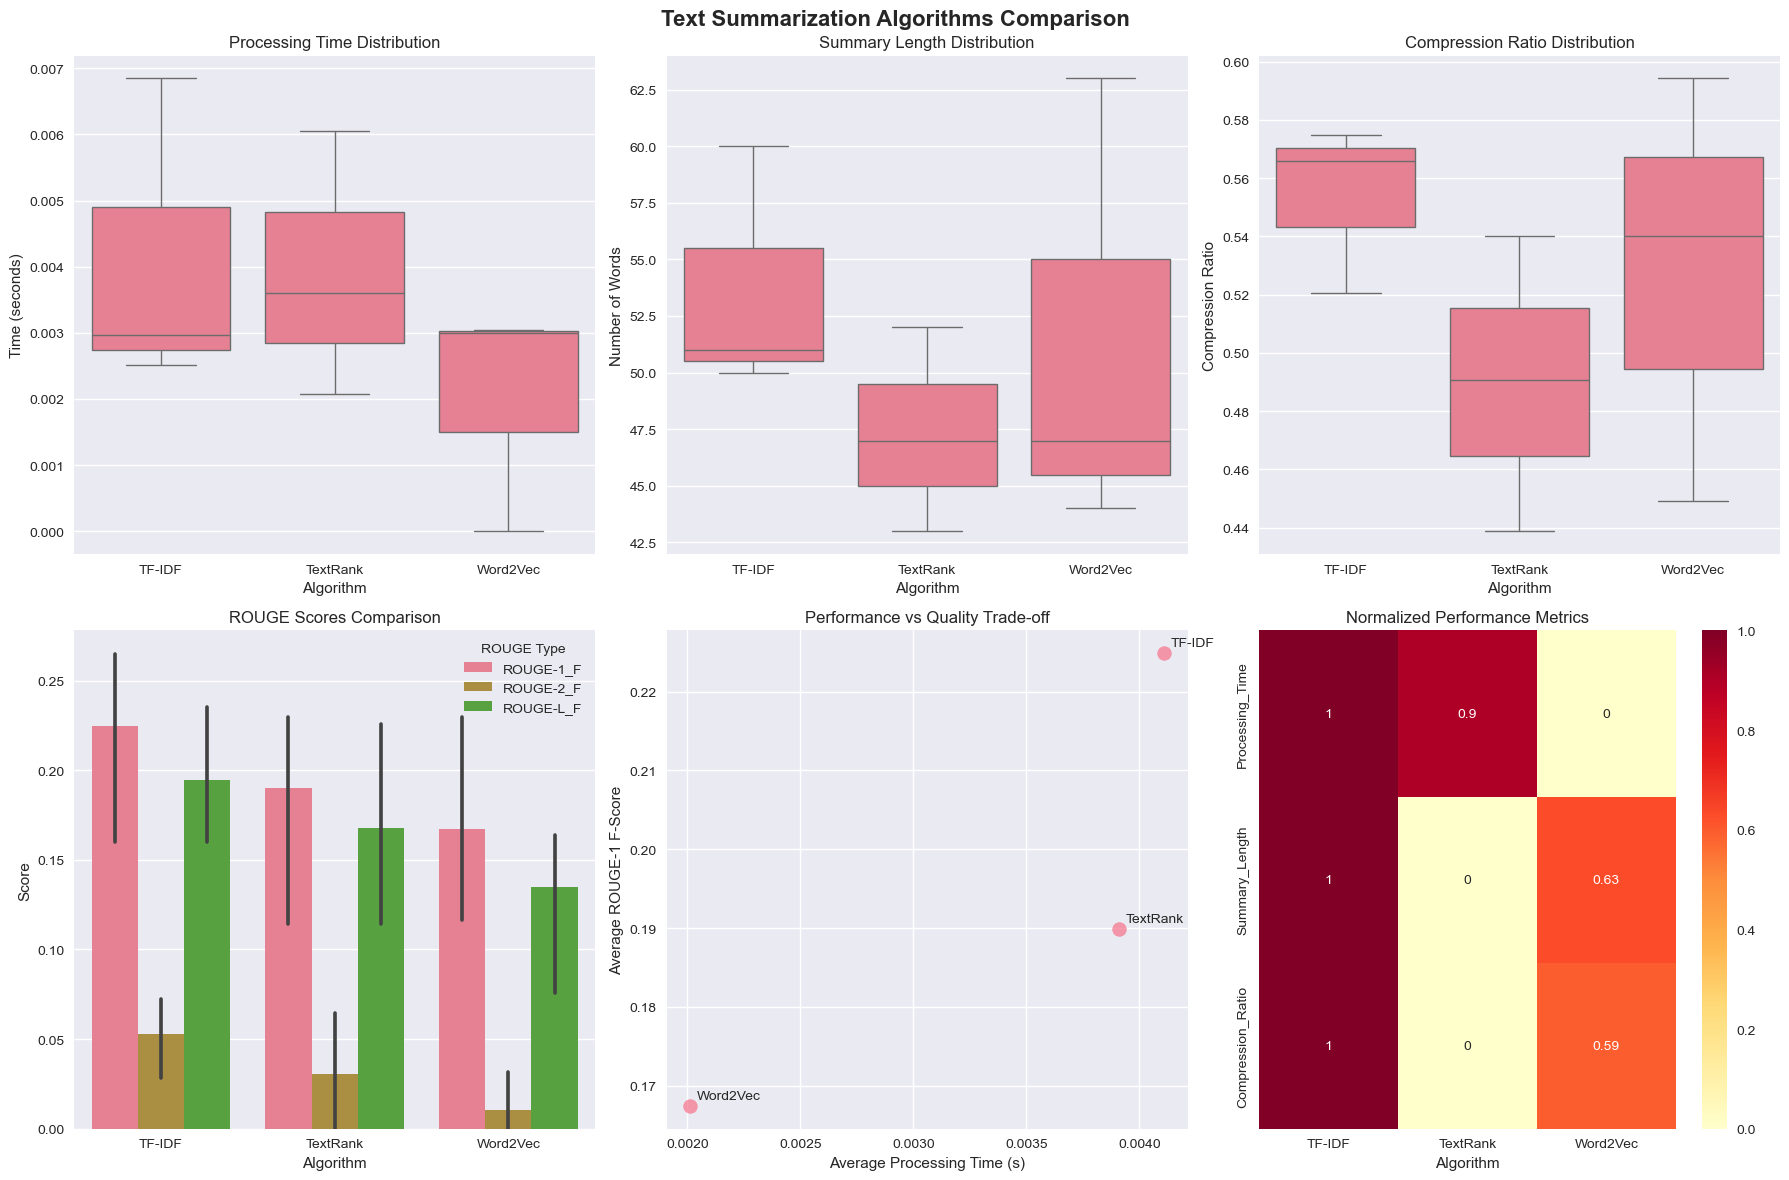

DETAILED ALGORITHM COMPARISON

TF-IDF Algorithm:
----------------------------------------
Average Processing Time: 0.0041s (±0.0024)
Average Summary Length: 53.7 words (±5.5)
Average Compression Ratio: 0.554 (±0.029)
Average ROUGE-1 F-Score: 0.225 (±0.057)
Average ROUGE-2 F-Score: 0.053 (±0.022)
Average ROUGE-L F-Score: 0.194 (±0.038)

TextRank Algorithm:
----------------------------------------
Average Processing Time: 0.0039s (±0.0020)
Average Summary Length: 47.3 words (±4.5)
Average Compression Ratio: 0.490 (±0.051)
Average ROUGE-1 F-Score: 0.190 (±0.065)
Average ROUGE-2 F-Score: 0.030 (±0.032)
Average ROUGE-L F-Score: 0.168 (±0.056)

Word2Vec Algorithm:
----------------------------------------
Average Processing Time: 0.0020s (±0.0017)
Average Summary Length: 51.3 words (±10.2)
Average Compression Ratio: 0.528 (±0.073)
Average ROUGE-1 F-Score: 0.167 (±0.081)
Average ROUGE-2 F-Score: 0.011 (±0.018)
Average ROUGE-L F-Score: 0.135 (±0.051)

SAMPLE SUMMARIES

Original Text 1 (first 20

In [363]:
import time
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

class SummarizationComparator:
    def __init__(self):
        self.tfidf_summarizer = TfidfSummarizer()
        self.textrank_summarizer = TextRankSummarizer()
        self.rouge = Rouge()
        self.word2vec_summarizer = Word2VecSummarizer()
        
    def compare_algorithms(self, texts, reference_summaries=None, num_sentences=5):
        """Compare all three summarization algorithms"""
        results = {
            'Algorithm': [],
            'Text_ID': [],
            'Summary': [],
            'Processing_Time': [],
            'Summary_Length': [],
            'Compression_Ratio': []
        }
        
        if reference_summaries:
            results.update({
                'ROUGE-1_F': [],
                'ROUGE-2_F': [],
                'ROUGE-L_F': []
            })
        
        # Train Word2Vec model
        w2v_path = r"C:\Users\melis\OneDrive\Masaüstü\My_Pacific_Technology_internship_project\PaTek_SECOND10DAY\w2v_model.model"
        # Eğer model varsa yükle
        try:
            self.word2vec_summarizer.model = Word2Vec.load(w2v_path)
            print("Word2Vec model loaded successfully.")
        except:
            print("Training new Word2Vec model...")
            self.word2vec_summarizer.train_w2v_model(texts)
            # Sonra kaydet
            self.word2vec_summarizer.model.save(w2v_path)

        algorithms = {
            'TF-IDF': lambda text: self.tfidf_summarizer.summarize_text_tfıdf(text, n=num_sentences),
            'TextRank': lambda text: self.textrank_summarizer.text_rank_summary(text, num_sentences=num_sentences),
            'Word2Vec': lambda text: self.word2vec_summarizer.w2v_summary(text, num_sents=num_sentences)
        }

        
        for text_id, text in enumerate(texts):
            original_length = len(text.split())
            
            for algo_name, algo_func in algorithms.items():
                start_time = time.time()
                
                try:
                    summary = algo_func(text)

                    processing_time = time.time() - start_time
                    summary_length = len(summary.split())
                    compression_ratio = summary_length / original_length if original_length > 0 else 0
                    
                    results['Algorithm'].append(algo_name)
                    results['Text_ID'].append(text_id)
                    results['Summary'].append(summary)
                    results['Processing_Time'].append(processing_time)
                    results['Summary_Length'].append(summary_length)
                    results['Compression_Ratio'].append(compression_ratio)
                    
                    # Calculate ROUGE scores if reference summaries provided
                    if reference_summaries and text_id < len(reference_summaries):
                        rouge_scores = self.rouge.get_scores(summary, reference_summaries[text_id])[0]
                        results['ROUGE-1_F'].append(rouge_scores['rouge-1']['f'])
                        results['ROUGE-2_F'].append(rouge_scores['rouge-2']['f'])
                        results['ROUGE-L_F'].append(rouge_scores['rouge-l']['f'])
                    
                except Exception as e:
                    print(f"Error with {algo_name} on text {text_id}: {str(e)}")
                    # Fill with default values in case of error
                    results['Algorithm'].append(algo_name)
                    results['Text_ID'].append(text_id)
                    results['Summary'].append("Error in summarization")
                    results['Processing_Time'].append(0)
                    results['Summary_Length'].append(0)
                    results['Compression_Ratio'].append(0)
                    
                    if reference_summaries:
                        results['ROUGE-1_F'].append(0)
                        results['ROUGE-2_F'].append(0)
                        results['ROUGE-L_F'].append(0)
        
        return pd.DataFrame(results)
    
    def visualize_results(self, df):
        """Create comprehensive visualizations of the comparison results"""
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('Text Summarization Algorithms Comparison', fontsize=16, fontweight='bold')
        
        # 1. Processing Time Comparison
        sns.boxplot(data=df, x='Algorithm', y='Processing_Time', ax=axes[0,0])
        axes[0,0].set_title('Processing Time Distribution')
        axes[0,0].set_ylabel('Time (seconds)')
        
        # 2. Summary Length Comparison
        sns.boxplot(data=df, x='Algorithm', y='Summary_Length', ax=axes[0,1])
        axes[0,1].set_title('Summary Length Distribution')
        axes[0,1].set_ylabel('Number of Words')
        
        # 3. Compression Ratio
        sns.boxplot(data=df, x='Algorithm', y='Compression_Ratio', ax=axes[0,2])
        axes[0,2].set_title('Compression Ratio Distribution')
        axes[0,2].set_ylabel('Compression Ratio')
        
        # 4. ROUGE Scores (if available)
        if 'ROUGE-1_F' in df.columns:
            rouge_data = df.melt(id_vars=['Algorithm'], 
                               value_vars=['ROUGE-1_F', 'ROUGE-2_F', 'ROUGE-L_F'],
                               var_name='ROUGE_Type', value_name='Score')
            sns.barplot(data=rouge_data, x='Algorithm', y='Score', hue='ROUGE_Type', ax=axes[1,0])
            axes[1,0].set_title('ROUGE Scores Comparison')
            axes[1,0].legend(title='ROUGE Type')
        else:
            axes[1,0].text(0.5, 0.5, 'No Reference Summaries\nProvided', 
                          ha='center', va='center', transform=axes[1,0].transAxes)
            axes[1,0].set_title('ROUGE Scores (N/A)')
        
        # 5. Performance vs Quality Trade-off
        if 'ROUGE-1_F' in df.columns:
            avg_stats = df.groupby('Algorithm').agg({
                'Processing_Time': 'mean',
                'ROUGE-1_F': 'mean'
            }).reset_index()
            
            scatter = axes[1,1].scatter(avg_stats['Processing_Time'], avg_stats['ROUGE-1_F'], 
                                      s=100, alpha=0.7)
            for i, txt in enumerate(avg_stats['Algorithm']):
                axes[1,1].annotate(txt, (avg_stats['Processing_Time'].iloc[i], 
                                        avg_stats['ROUGE-1_F'].iloc[i]), 
                                  xytext=(5, 5), textcoords='offset points')
            axes[1,1].set_xlabel('Average Processing Time (s)')
            axes[1,1].set_ylabel('Average ROUGE-1 F-Score')
            axes[1,1].set_title('Performance vs Quality Trade-off')
        else:
            axes[1,1].text(0.5, 0.5, 'Performance vs Quality\n(Requires Reference Summaries)', 
                          ha='center', va='center', transform=axes[1,1].transAxes)
            axes[1,1].set_title('Performance vs Quality (N/A)')
        
        # 6. Algorithm Statistics Summary
        stats_summary = df.groupby('Algorithm').agg({
            'Processing_Time': ['mean', 'std'],
            'Summary_Length': ['mean', 'std'],
            'Compression_Ratio': ['mean', 'std']
        }).round(4)
        
        # Create a heatmap of normalized statistics
        stats_for_heatmap = df.groupby('Algorithm').agg({
            'Processing_Time': 'mean',
            'Summary_Length': 'mean',
            'Compression_Ratio': 'mean'
        })
        
        # Normalize the data for better visualization
        normalized_stats = (stats_for_heatmap - stats_for_heatmap.min()) / (stats_for_heatmap.max() - stats_for_heatmap.min())
        
        sns.heatmap(normalized_stats.T, annot=True, cmap='YlOrRd', ax=axes[1,2])
        axes[1,2].set_title('Normalized Performance Metrics')
        axes[1,2].set_xlabel('Algorithm')
        
        plt.tight_layout()
        plt.show()
        
        return stats_summary
    
    def print_detailed_comparison(self, df):
        """Print detailed statistical comparison"""
        print("="*80)
        print("DETAILED ALGORITHM COMPARISON")
        print("="*80)
        
        for algorithm in df['Algorithm'].unique():
            algo_data = df[df['Algorithm'] == algorithm]
            print(f"\n{algorithm} Algorithm:")
            print("-" * 40)
            print(f"Average Processing Time: {algo_data['Processing_Time'].mean():.4f}s (±{algo_data['Processing_Time'].std():.4f})")
            print(f"Average Summary Length: {algo_data['Summary_Length'].mean():.1f} words (±{algo_data['Summary_Length'].std():.1f})")
            print(f"Average Compression Ratio: {algo_data['Compression_Ratio'].mean():.3f} (±{algo_data['Compression_Ratio'].std():.3f})")
            
            if 'ROUGE-1_F' in df.columns:
                print(f"Average ROUGE-1 F-Score: {algo_data['ROUGE-1_F'].mean():.3f} (±{algo_data['ROUGE-1_F'].std():.3f})")
                print(f"Average ROUGE-2 F-Score: {algo_data['ROUGE-2_F'].mean():.3f} (±{algo_data['ROUGE-2_F'].std():.3f})")
                print(f"Average ROUGE-L F-Score: {algo_data['ROUGE-L_F'].mean():.3f} (±{algo_data['ROUGE-L_F'].std():.3f})")

# Example usage and demonstration
def demo_comparison():
    test=pd.read_csv("test.csv")
    sample_texts = test["article"].tolist()
    reference_summaries = test["highlights"].tolist()
    
    article_token = [word_tokenize(a.lower()) for a in sample_texts]
    summary_token = [["<sos>"] + word_tokenize(s.lower()) + ["<eos>"] for s in reference_summaries]
    
    # Create comparator and run comparison
    comparator = SummarizationComparator()
    print("Starting algorithm comparison...")
    
    # Compare algorithms
    results_df = comparator.compare_algorithms(
        texts=sample_texts, 
        reference_summaries=reference_summaries, 
        num_sentences=3
    )
    
    # Visualize results
    stats_summary = comparator.visualize_results(results_df)
    
    # Print detailed comparison
    comparator.print_detailed_comparison(results_df)
    
    # Display sample summaries
    print("\n" + "="*80)
    print("SAMPLE SUMMARIES")
    print("="*80)
    
    for text_id in range(len(sample_texts)):
        print(f"\nOriginal Text {text_id + 1} (first 200 chars):")
        print(sample_texts[text_id][:200] + "...")
        print("\nSummaries:")
        
        for algorithm in results_df['Algorithm'].unique():
            summary = results_df[(results_df['Text_ID'] == text_id) & 
                               (results_df['Algorithm'] == algorithm)]['Summary'].iloc[0]
            print(f"{algorithm}: {summary}")
        print("-" * 60)
    
    return results_df, stats_summary

# Run the demonstration
if __name__ == "__main__":
    results_df, stats_summary = demo_comparison()
    print("\nComparison completed successfully!")

# Gün- 4&5 Abstractive Yöntemler

### ortak yerler

In [249]:
dataframe=pd.read_csv("preprocessed_dataset.csv")

In [55]:
import torch
from nltk.tokenize import word_tokenize

class TextPreprocessor:
    def __init__(self):
        self.word2idx = {}
        self.idx2word = {}
        self.vocab_size = 0

    def tokanize(self,articles,summaries):
        article_token=[]
        for sents in articles:
            a_t= word_tokenize(sents)
            article_token.append(a_t)
    
        summary_token=[]
        for sent in summaries:
            s_t= ["<sos>"] + word_tokenize(sent) + ["<eos>"]
            summary_token.append(s_t)
        return article_token,summary_token
    #articles =dataframe.article_cleaned
    #summaries = dataframe.summary_cleaned
    #article_token,summary_token=tokanize(articles,summaries)
    #[['The', 'cat', 'sat', 'on', 'the', 'mat', '.'],['Dogs', 'are', 'playing', 'in', 'the', 'park', '.']]
    #[['<sos>', 'Cat', 'on', 'mat', '.', '<eos>'],['<sos>', 'Dogs', 'playing', '.', '<eos>']]


    def build_vocabulary(self,article_token,summary_token):
        # article ve summarydeki kelimeleri almak
        all_words=[]
        for sent in article_token+summary_token: # cumlelerı verır ['Dogs', 'are', 'playing', 'in', 'the', 'park', '.']
            for w in sent:# <sos>,Cat,on,mat, .,<eos>
                all_words.append(w.lower())
    
        # benzersiz kelimeleri bulmak
        unique_words= list(set(all_words))
    
        # paddinge 0 atadık,unknown icin 1 atadık index olarak diger kelimelere de index atadı
        self.word2idx = {"<pad>": 0, "<unk>": 1} #{'<pad>': 0,'<unk>': 1,'The': 2,'.': 3,'<sos>': 4,...,}
        idx = 2
        for w in unique_words:
            self.word2idx[w.lower()] = idx
            idx += 1
       
        #indexlere kelime atıyoruz sımdı de
        self.idx2word = {} #{0: '<pad>',1: '<unk>',2: 'The',3: '.', 4: '<sos>',..,}
        for w, i in self.word2idx.items():
            self.idx2word[i] = w
    
        self.vocab_size = len(self.word2idx) #bir embedding katmanı oluştururken, bu katmanın boyutu (vocab_size, embedding_dimension) şeklinde ayarlanır.10 kelimelik bir sözlüğünüz varsa, matrisin 10 satırı olur. 
        return self.word2idx, self.idx2word, self.vocab_size


    def encode_seq(self,tokens,max_len=20):
        ids=[] #ids=encode_seq(["melisa","aslan","The"])-->>[1, 1, 2][unk,unk,The] ama boyle kelime sayısı es olmayacak maxlen kadar olması lazım paddıng yap
        for token in tokens:
            token=token.lower()
            if token in self.word2idx:
                ids.append(self.word2idx[token])
            else:
                ids.append(self.word2idx["<unk>"])
    
        while len(ids) < max_len:
            ids.append(self.word2idx["<pad>"])
        ids = ids[:max_len]
        return ids #[1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] oldu padding ile 
    
    #xx =encode_seq(["I","HAve","AD"]) 
    #print(i2w)
    #print("------")
    #print(xx)

    def prepare_train_data(self,articles_tok,summaries_tok,max_art_len=1000,max_sum_len=150):
        """
        max_art_len → Her makale (article) için maksimum token sayısını belirler.
        max_sum_len → Her özet (summary) için maksimum token sayısını belirler.
        """
        x=[] #articles
        Y=[] #summaries
        for article_tokens, summary_tokens in zip(articles_tok, summaries_tok):
                # makaleyi encode et
                article_ids = self.encode_seq(article_tokens, max_art_len)
                x.append(article_ids)
                # ozeti encode et
                summary_ids = self.encode_seq(summary_tokens, max_sum_len)
                Y.append(summary_ids)
        X = torch.tensor(x, dtype=torch.long)
        Y = torch.tensor(Y, dtype=torch.long)
        
        print(f"✅ Eğitim verileri hazırlandı!")
        print(f"   📊 X shape: {X.shape} (makale sequences)")
        print(f"   📊 Y shape: {Y.shape} (özet sequences)")
        
        return X, Y
    #x,y=prepare_train_data(article_token,summary_token)
    #print(x)
    #print("---")
    #print(y)


In [65]:
import pandas as pd
import pickle
from nltk.tokenize import word_tokenize

dataframe = pd.read_csv("preprocessed_dataset.csv")
articles = dataframe.article_cleaned
summaries = dataframe.summary_cleaned
article_token = [word_tokenize(a.lower()) for a in articles]
summary_token = [["<sos>"] + word_tokenize(s.lower()) + ["<eos>"] for s in summaries]

all_tokens = article_token + summary_token
word2idx = {"<pad>": 0, "<unk>": 1}
idx = 2
for sent in all_tokens:
    for w in sent:
        w_lower = w.lower()
        if w_lower not in word2idx:
            word2idx[w_lower] = idx
            idx += 1

idx2word = {i: w for w, i in word2idx.items()}
vocab_size = len(word2idx)

print(f"✅ Vocabulary boyutu: {vocab_size}")
with open("word2idx_fixed.pkl", "wb") as f:
    pickle.dump(word2idx, f)


✅ Vocabulary boyutu: 46500


### Seq2Seq Colab

In [35]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
import random

class Seq2SeqTrainer:
    def __init__(self, vocab_size, word2idx, device, embedding_size=64, hidden_size=128, num_layers=4):
        self.vocab_size = vocab_size
        self.word2idx = word2idx
        self.device = device
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Modelleri oluştur
        self.encoder = self._build_encoder()
        self.decoder = self._build_decoder()
        self.model = self._build_seq2seq()
        self.model.to(self.device)

    def _build_encoder(self):
        """Çünkü nn.Embedding katmanı kelimeleri index’ten (0,1,2,...) alıp bir vektöre çeviriyor.
        padding_idx parametresini verince embedding tablosunda bu satır hep sıfır vektör olur. Böylece LSTM boş yerlerden öğrenmeye çalışmaz.
        vocab_size → kaç kelime var? (embedding tablosu satır sayısı) embed_size → her kelime kaç sayıyla temsil edilecek? 
        hidden_size → LSTM’in hafızası kaç boyutlu olacak?
        """
        class Encoder(nn.Module):
            def __init__(self, vocab_size, embedding_size, hidden_size, num_layers,padding_idx):
                super(Encoder, self).__init__()
                self.embedding= nn.Embedding(vocab_size,embedding_size, padding_idx=padding_idx)
                self.lstm = nn.LSTM(embedding_size, hidden_size, batch_first=True,num_layers=num_layers)
            def forward(self,input_):
                embedded = self.embedding(input_)  # [batch_size, seq_len, embed_size]
                outputs, (hidden, cell) = self.lstm(embedded)
                # outputs: [batch_size, seq_len, hidden_size]
                # hidden, cell: [num_layers, batch_size, hidden_size]
                return hidden, cell
                
        encoder = Encoder(self.vocab_size, self.embedding_size, self.hidden_size,self.num_layers,self.word2idx["<pad>"])
        return encoder
    #encoder(size,64,128,10)            

    
    def _build_decoder(self):
        """Encoder ve Decoder farkı: Encoder input cümleyi embedding’e sokar. Decoder, bir önceki tahmin edilen token’ı embedding’e sokar.
        self.fc = nn.Linear(hidden_size, vocab_size)
        Amaç: LSTM’in çıktısını kelime tahminine çevirmek.
        LSTM output’u [batch_size, 1, hidden_size] → bunu [batch_size, 1, vocab_size] yapıyoruz.
        vocab_size → her kelimeye olasılık vermek için.
        Yani, Linear layer aslında her gizli vektörü kelime olasılığına çeviriyor.
        Encoder’da neden yok? Encoder sadece cümlenin bilgisini saklıyor, tahmin üretmiyor. Decoder tahmin ürettiği için Linear gerekiyor."""
        class Decoder(nn.Module):
            def __init__(self,vocab_size,embedding_size,hidden_size,num_layers,padding_idx):
                super(Decoder,self).__init__()
                self.embedding=nn.Embedding(vocab_size,embedding_size, padding_idx=padding_idx)
                self.lstm=nn.LSTM(embedding_size,hidden_size,num_layers=num_layers,batch_first=True)
                self.fc= nn.Linear(hidden_size,vocab_size)
            def forward(self,input_, hidden, cell):
                embedded=self.embedding(input_)
                output,(hidden,cell)= self.lstm(embedded,(hidden, cell))
                predictions = self.fc(output)
                return predictions, hidden, cell
            
        decoder = Decoder(self.vocab_size, self.embedding_size, self.hidden_size,self.num_layers,self.word2idx["<pad>"])
        return decoder
        #decoder(size,64,128,10)
    
    def _build_seq2seq(self):
        """Encoder (Kodlayıcı):Encoder'ın görevi, giriş dizisindeki (örneğin, bir makaledeki kelimeler) tüm bilgiyi okumak ve bu bilgiyi tek bir 
    vektörde veya gizli durum (hidden state) olarak sıkıştırmaktır.Bu vektör, giriş cümlesinin "anlamını" temsil eden bir özet gibidir.
    Sizin kodunuzda hidden, cell = self.encoder(src) satırı bu işlemi yapar. 
    src (source) yani kaynak metin, encoder'a verilir ve encoder, metnin tamamını özetleyen hidden (gizli) ve cell (hücre) durumlarını döndürür.
        Decoder (Kod Çözücü):Decoder'ın görevi, encoder'ın ürettiği gizli durum vektörünü alarak,
    istenen hedef diziyi (örneğin, makale özeti) adım adım oluşturmaktır.Her adımda, decoder bir kelime tahmin eder ve 
    bu tahmini bir sonraki adımı için girdi olarak kullanır."""
        
        class Seq2Seq(nn.Module):
            def __init__(self,encoder,decoder,device):
                super(Seq2Seq,self).__init__()
                self.encoder=encoder
                self.decoder=decoder
                self.device=device
                
            def forward(self, src, trg, teacher_forcing_ratio=0.5):
                batch_size = src.shape[0] #src=source yanı metının ta kendısı ->shape[0] = Satır sayısı. Her satır bir metin örneğidir.
                trg_len = trg.shape[1] #target yanı ozetın ta kendısı->shape[1]=Sütun sayısı. Her sütun, o metindeki bir kelimeyi (token) temsil eder.
                outputs = torch.zeros(batch_size, trg_len, self.decoder.fc.out_features).to(self.device)
                
                hidden, cell = self.encoder(src)
                # <sos> token
                decoder_input = trg[:, 0].unsqueeze(1)
                # Her zaman adımında bir token üret
                for t in range(1, trg_len):
                    # tahmin yap
                    output, hidden, cell = self.decoder(decoder_input, hidden, cell)
                    outputs[:, t, :] = output.squeeze(1)
                    # Sonraki input'u belirle (Teacher Forcing)
                    top1 = output.argmax(dim=2)  # En yüksek skorlu token
                    # Teacher forcing: Bazen gerçek token, bazen tahmin edilen token kullan
                    use_teacher_forcing = random.random() < teacher_forcing_ratio
                    decoder_input = trg[:, t].unsqueeze(1) if use_teacher_forcing else top1
                return outputs
        model = Seq2Seq(self.encoder, self.decoder, self.device)
        return model
        #seq2seq(encoder, decoder)

    def train(self, X, Y, epochs=50, lr=0.001, batch_size=16):
        criterion = nn.CrossEntropyLoss(ignore_index=self.word2idx["<pad>"])
        optimizer = optim.Adam(self.model.parameters(), lr=lr)
        dataset = TensorDataset(X, Y)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

        losses = []
        for epoch in range(epochs):
            epoch_loss = 0
            for X_batch, Y_batch in loader:
                X_batch, Y_batch = X_batch.to(self.device), Y_batch.to(self.device)
                optimizer.zero_grad()
                output = self.model(X_batch, Y_batch, teacher_forcing_ratio=0.7)
                loss = criterion(output[:,1:,:].reshape(-1, self.vocab_size), Y_batch[:,1:].reshape(-1))
                loss.backward()
                torch.nn.utils.clip_grad_norm_(self.model.parameters(), 1)
                optimizer.step()
                epoch_loss += loss.item()
            avg_loss = epoch_loss / len(loader)
            losses.append(avg_loss)
            if (epoch + 1) % 5 == 0:
                print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
        print("✅ Eğitim tamamlandı!")
        return self.model, losses

    def save_model(self, path="seq2seq_model.pth"):
        torch.save(self.model.state_dict(), path)
        print(f"Model '{path}' olarak kaydedildi.")


In [285]:
import random
if __name__ == '__main__':

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    articles =dataframe.article_cleaned
    summaries = dataframe.summary_cleaned
    
    article_token, summary_token = tokanize(articles, summaries)
    word2idx, idx2word, vocab_size = vocabulary(article_token, summary_token)
    
    print(f"Sözlük boyutu: {vocab_size}")
    X_train, Y_train = prepare_train_data(article_token, summary_token)
    trainer = Seq2SeqTrainer(vocab_size, word2idx, device, embedding_size=64, hidden_size=128, num_layers=2)
    trained_model, losses = trainer.train(X_train, Y_train, epochs=50)
    trainer.save_model("seq2seq_model.pth")
    
    # Modellerin aynı olup olmadığını kontrol etmek için parametrelerini karşılaştırabiliriz
    # print(trained_model.state_dict()['encoder.lstm.weight_ih_l0'] == loaded_model.state_dict()['encoder.lstm.weight_ih_l0'])


Sözlük boyutu: 46500


KeyboardInterrupt: 

### Seq2Seq + Attention Colab

In [80]:
class Seq2SeqTrainerAttention:
    def __init__(self, vocab_size, word2idx, device, embedding_size=64, hidden_size=128, num_layers=2):
        self.vocab_size = vocab_size
        self.word2idx = word2idx
        self.device = device
        self.embedding_size = embedding_size
        self.hidden_size = hidden_size
        self.num_layers = num_layers

        # Modelleri oluştur
        self.encoder = self.AttentionEncoder(vocab_size, embedding_size, hidden_size, num_layers,padding_idx=word2idx["<pad>"])
        self.decoder = self.AttentionDecoder(vocab_size, embedding_size, hidden_size, num_layers,padding_idx=word2idx["<pad>"])
        self.model = self.AttentionSeq2Seq(self.encoder, self.decoder, device)
        self.model.to(self.device)
        
    class AttentionEncoder(nn.Module):
        def __init__(self, vocab_size, embedding_size, hidden_size, num_layers,padding_idx):
            super().__init__()
            self.embedding= nn.Embedding(vocab_size, embedding_size, padding_idx=padding_idx)
            self.lstm = nn.LSTM(embedding_size, hidden_size, batch_first=True, num_layers=num_layers, bidirectional=False)
    
        def forward(self, input_):
            embedded = self.embedding(input_)
            outputs, (hidden, cell) = self.lstm(embedded)
            return outputs, hidden, cell

    class Attention(nn.Module):
        """
        self.attn: Bu, "enerji" (energy) veya "uyum puanı" (alignment score) adı verilen bir değeri hesaplamak için kullanılır.
    Bu katman, decoder'ın son gizli durumu ile encoder'ın her bir zaman adımındaki çıktılarını birleştirir ve bu ikisi arasındaki ilişkiyi öğrenir. 
    hidden_size * 2 kullanırız çünkü her iki vektörü (hidden ve encoder_outputs) birleştiririz.
        self.v: Bu katman, enerji vektörünü alıp tek bir sayıya (skora) dönüştürür. Bu, her bir encoder çıktısının ne kadar önemli olduğunu gösteren
    ham bir puandır. bias=False ifadesi, bu katmanın ağırlıklarına bir bias terimi eklememesini sağlar.
    """
        """
        torch.cat: hidden_expanded ve encoder_outputs tensörlerini son boyutta (dim=2) birleştirir. 
    Sonuç (batch, seq_len, hidden_size * 2) boyutunda olur.
        self.attn(...): Bu birleştirilmiş tensörü, self.attn lineer katmanına besleyerek her bir encoder çıktısı için bir "enerji" vektörü hesaplar.
        torch.tanh: Sonucu normalize etmek ve enerji değerlerini belirli bir aralıkta tutmak için (tanh) aktivasyon fonksiyonu uygulanır.
        """
        """
        torch.softmax: Bu, dikkat puanlarını olasılık dağılımına dönüştürür.Bu ağırlıklar,her bir encoder çıktısına
    ne kadar dikkat edilmesi gerektiğini gösterir.
        """
    
        def __init__(self, hidden_size):
            super().__init__()
            self.attn = nn.Linear(hidden_size * 2, hidden_size)
            self.v = nn.Linear(hidden_size, 1, bias=False)
    
        def forward(self, hidden, encoder_outputs):
            # hidden: (num_layers, batch, hidden_size) → son layer al
            hidden = hidden[-1].unsqueeze(1)  # (batch, 1, hidden_size)
    
            seq_len = encoder_outputs.shape[1]
            hidden_expanded = hidden.repeat(1, seq_len, 1)  # (batch, seq_len, hidden_size)
    
            energy = torch.tanh(self.attn(torch.cat((hidden_expanded, encoder_outputs), dim=2)))
            attention = self.v(energy).squeeze(2)  # (batch, seq_len)
            attention_weights = torch.softmax(attention, dim=1)
    
            context = torch.bmm(attention_weights.unsqueeze(1), encoder_outputs)  # (batch, 1, hidden)
            return context, attention_weights

    class AttentionDecoder(nn.Module):
        def __init__(self, vocab_size, embedding_size, hidden_size, num_layers,padding_idx):
            super().__init__()
            self.embedding = nn.Embedding(vocab_size, embedding_size, padding_idx=padding_idx)
            self.lstm = nn.LSTM(embedding_size + hidden_size, hidden_size, num_layers=num_layers, batch_first=True)
            self.fc = nn.Linear(hidden_size * 2, vocab_size)
            self.attention = Seq2SeqTrainerAttention.Attention(hidden_size) # dikkat attention eklendi
    
        def forward(self, input_, hidden, cell, encoder_outputs):
            embedded = self.embedding(input_)  
            context, attn_weights = self.attention(hidden, encoder_outputs)
            rnn_input = torch.cat((embedded, context), dim=2)  
            output, (hidden, cell) = self.lstm(rnn_input, (hidden, cell))
            prediction = self.fc(torch.cat((output, context), dim=2))
            return prediction, hidden, cell, attn_weights

    class AttentionSeq2Seq(nn.Module):
        def __init__(self, encoder, decoder, device):
            super().__init__()
            self.encoder = encoder
            self.decoder = decoder
            self.device = device
    
        def forward(self, src, trg, teacher_forcing_ratio=0.5):
            batch_size = src.shape[0]
            trg_len = trg.shape[1]
            outputs = torch.zeros(batch_size, trg_len, self.decoder.fc.out_features).to(self.device)
            encoder_outputs, hidden, cell = self.encoder(src)
    
            decoder_input = trg[:, 0].unsqueeze(1)  # <sos>
            for t in range(1, trg_len):
                output, hidden, cell, attn_w = self.decoder(decoder_input, hidden, cell, encoder_outputs)
                outputs[:, t, :] = output.squeeze(1)
                top1 = output.argmax(dim=2)
                use_teacher_forcing = random.random() < teacher_forcing_ratio
                decoder_input = trg[:, t].unsqueeze(1) if use_teacher_forcing else top1
            return outputs

    def train_model(self, X, Y, epochs=5, learning_rate=0.001, batch_size=16):
        criterion = nn.CrossEntropyLoss(ignore_index=self.word2idx["<pad>"])
        optimizer = optim.Adam(self.model.parameters(), lr=learning_rate)
        model = self.model.to(self.device)
        dataset = TensorDataset(X, Y)
        loader = DataLoader(dataset, batch_size=batch_size, shuffle=True)
        losses = []
        for epoch in range(epochs):
            epoch_loss = 0
            for X_batch, Y_batch in loader:
                X_batch = X_batch.to(self.device)
                Y_batch = Y_batch.to(self.device)
                optimizer.zero_grad()
                output = self.model(X_batch, Y_batch, teacher_forcing_ratio=0.7)
                output_dim = output.shape[-1]
                loss = criterion(output[:,1:,:].reshape(-1, output_dim), Y_batch[:,1:].reshape(-1))
                loss.backward()
                torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1)
                optimizer.step()
                epoch_loss += loss.item()
            avg_loss = epoch_loss / len(loader)
            losses.append(avg_loss)
            print(f"Epoch {epoch+1}/{epochs}, Loss: {avg_loss:.4f}")
        print(f"✅ Eğitim tamamlandı! Final Loss: {losses[-1]:.4f}")
        torch.save(model.state_dict(), "attention_seq2seq_model.pth")
        return model, losses
    
    


In [ ]:
if __name__ == '__main__':
    embed_size = 64
    hidden_size = 128

    articles = dataframe.article_cleaned
    summaries = dataframe.summary_cleaned
    
    article_token, summary_token = tokanize(articles, summaries)
    word2idx, idx2word, vocab_size = vocabulary(article_token, summary_token)
    
    print(f"Sözlük boyutu: {vocab_size}")
    X_train, Y_train = prepare_train_data(article_token, summary_token)

    encoder_model = Encoder(vocab_size, embed_size, hidden_size, num_layers=1)
    decoder_model = Decoder(vocab_size, embed_size, hidden_size, num_layers=1)
    seq2seq_model = Seq2Seq(encoder_model, decoder_model, device)
    
    trained_model, losses = train_model(seq2seq_model, X_train, Y_train, word2idx, device, epochs=10)

### LLM T5 COLAB

In [5]:
!pip uninstall transformers

In [7]:
!pip install transformers==4.28.0

  Using cached transformers-4.28.0-py3-none-any.whl.metadata (109 kB)
  Using cached tokenizers-0.13.3.tar.gz (314 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Using cached transformers-4.28.0-py3-none-any.whl (7.0 MB)
Failed to build tokenizers


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [62 lines of output]
  C:\Users\melis\AppData\Local\Temp\pip-build-env-tapqppuc\overlay\Lib\site-packages\setuptools\dist.py:759: SetuptoolsDeprecationWarning: License classifiers are deprecated.
  !!
  
          ********************************************************************************
          Please consider removing the following classifiers in favor of a SPDX license expression:
  
          License :: OSI Approved :: Apache Software License
  
          See https://packaging.python.org/en/latest/guides/writing-pyproject-toml/#license for details.
          ********************************************************************************
  
  !!
    self._finalize_license_expression()
  running bdist_wheel
  running build
  running build_py
  creating build\lib.win-amd64-cpython-312\tokenizers
  copying py_src\tokenizers\__init__.py -> build\lib.win-amd64-cpython-312\tokenizers
  creating build\lib.win-amd64-cpyth

In [9]:
!pip install --upgrade torch datasets evaluate accelerate

In [5]:
from torch.utils.data import Dataset, DataLoader
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
import evaluate
from datasets import Dataset as HFDataset # HUGGINGFACE in istediği standarta donusturur senın verisetini

In [ ]:
"""
!pip install transformers datasets sentencepiece evaluate rouge-score -q
import pandas as pd
import torch
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
import evaluate
from datasets import Dataset as HFDataset

df = pd.read_csv("preprocessed_dataset.csv")
df = df[['article_cleaned', 'summary_cleaned']].dropna()
dataset = HFDataset.from_pandas(df)
dataset = dataset.train_test_split(test_size=0.2, seed=42)
train_ds, test_ds = dataset['train'], dataset['test']
print(f"✅ Veri seti başarıyla bölündü. Eğitim boyutu: {len(train_ds)}, Test boyutu: {len(test_ds)}")

MODEL_NAME = "t5-small"
tokenizer = T5Tokenizer.from_pretrained(MODEL_NAME)

def preprocess_function(examples):
    inputs = ["summarize: " + doc for doc in examples["article_cleaned"]]
    model_inputs = tokenizer(inputs, max_length=128, truncation=True, padding="max_length")
    labels = tokenizer(examples["summary_cleaned"], max_length=64, truncation=True, padding="max_length")
    model_inputs["labels"] = labels["input_ids"]
    return model_inputs

tokenized_train = train_ds.map(preprocess_function, batched=True, remove_columns=["article_cleaned", "summary_cleaned"])
tokenized_test  = test_ds.map(preprocess_function, batched=True, remove_columns=["article_cleaned", "summary_cleaned"])
print("✅ Tokenizer işlemi tamamlandı.")

model = T5ForConditionalGeneration.from_pretrained(MODEL_NAME)

rouge = evaluate.load("rouge")

def compute_metrics(eval_pred):
    preds, labels = eval_pred
    decoded_preds = tokenizer.batch_decode(preds, skip_special_tokens=True)
    decoded_labels = tokenizer.batch_decode(labels, skip_special_tokens=True)
    result = rouge.compute(predictions=decoded_preds, references=decoded_labels)
    return {k: round(v*100, 2) for k,v in result.items()}

training_args = TrainingArguments(
    output_dir="./t5_summarization",
    per_device_train_batch_size=2,       # Küçük batch → GPU memory yönetimi
    per_device_eval_batch_size=2,
    gradient_accumulation_steps=2,       # Küçük batch + accumulation → efektif batch 4
    num_train_epochs=5,
    learning_rate=5e-5,
    logging_dir="./logs",
    logging_steps=50,
    save_total_limit=2,
    report_to="none"
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

# Manüel epoch ilerlemesi ve log
for epoch in range(int(training_args.num_train_epochs)):
    print(f"\n🔹 Epoch {epoch+1}/{int(training_args.num_train_epochs)} başlıyor...")
    trainer.train()
    torch.cuda.empty_cache()  # Her epoch sonrası GPU temizliği
    print(f"✅ Epoch {epoch+1} tamamlandı.")

print("✅ Eğitim tamamlandı.")
trainer.save_model("./t5_summarization/final_model")
print("✅ Model yerel olarak kaydedildi.")

!zip -r t5_summarization.zip ./t5_summarization
from google.colab import files
files.download("t5_summarization.zip")


# Gun- 6&7 COMPARE CODE BLOKS

In [27]:
!pip install rouge
import nltk
from nltk.tokenize import word_tokenize

                                           reference  \
0  timewarner said fourth quarter sales rose 2 to...   
1  the dollar has hit its highest level against t...   
2  yukos owner menatep group says it will ask ros...   
3  rod eddington , bas chief executive , said the...   
4  pernod has reduced the debt it took on to fund...   

                                          prediction    rouge1  rouge2  \
0  goodman.a goodman.a goodman.a goodman.a goodma...  0.016461     0.0   
1  goodman.a goodman.a goodman.a goodman.a goodma...  0.022814     0.0   
2  goodman.a goodman.a goodman.a goodman.a goodma...  0.035874     0.0   
3  goodman.a goodman.a goodman.a goodman.a goodma...  0.046512     0.0   
4  goodman.a goodman.a goodman.a goodman.a goodma...  0.019324     0.0   

     rougeL  bleu  meteor  
0  0.016461     0     0.0  
1  0.022814     0     0.0  
2  0.035874     0     0.0  
3  0.046512     0     0.0  
4  0.019324     0     0.0  


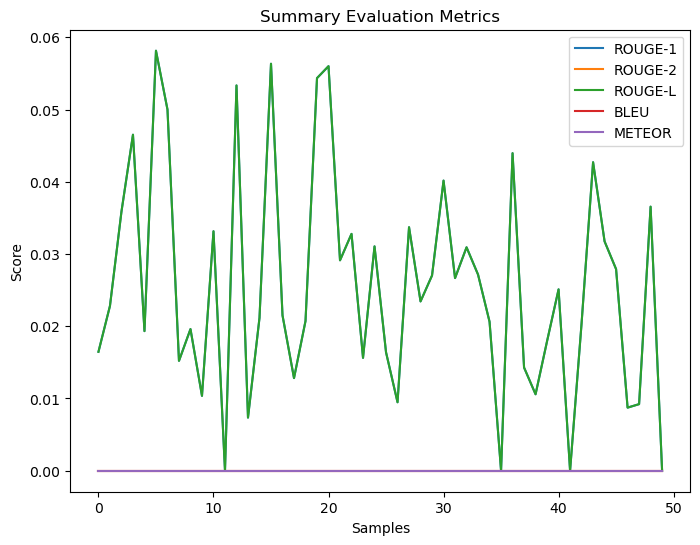

In [121]:
import torch
import pickle
import pandas as pd
from nltk.tokenize import word_tokenize
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score
import matplotlib.pyplot as plt

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

with open("word2idx_fixed.pkl", "rb") as f:
    word2idx = pickle.load(f)

idx2word = {i: w for w, i in word2idx.items()}
vocab_size = len(word2idx)

# -------------------------
# Model yükleme
# -------------------------
trainer = Seq2SeqTrainer(
    vocab_size=vocab_size,
    word2idx=word2idx,
    device=device,
    embedding_size=64,
    hidden_size=128,
    num_layers=5
)

trainer.model.load_state_dict(torch.load(
    "seq2seq_model.pth",
    map_location=device
))
trainer.model.to(device)
trainer.model.eval()

def generate_summary(model, article_tokens, word2idx, idx2word, device, 
                     max_len=50, beam_width=3, temperature=0.7):
    model.eval()
    with torch.no_grad():
        article_ids = [word2idx.get(w.lower(), word2idx["<unk>"]) for w in article_tokens]
        max_article_len = 1000
        article_ids = (article_ids + [word2idx["<pad>"]] * max_article_len)[:max_article_len]
        article_tensor = torch.tensor([article_ids], dtype=torch.long).to(device)

        hidden, cell = model.encoder(article_tensor)
        decoder_input = torch.tensor([[word2idx["<sos>"]]], device=device)

        sequences = [(decoder_input, hidden, cell, [], 0.0)]

        for _ in range(max_len):
            all_candidates = []

            for dec_in, h, c, tokens, score in sequences:
                output, h_new, c_new = model.decoder(dec_in, h, c)
                probs = torch.softmax(output[:, -1, :] / temperature, dim=-1)

                top_probs, top_idx = probs.topk(beam_width + 5)
                filtered = [(p, i.item()) for p, i in zip(top_probs[0], top_idx[0])
                            if i in idx2word and i != word2idx["<unk>"]]

                if not filtered:
                    # Eğer filtre boşsa, topk'den fallback al
                    filtered = [(p.item(), i.item()) for p, i in zip(top_probs[0], top_idx[0])]

                filtered = filtered[:beam_width]

                for p, word_id in filtered:
                    word_score = score + torch.log(torch.tensor(p)).item()
                    candidate_tokens = tokens + [idx2word.get(word_id, "<unk>")]
                    dec_input = torch.tensor([[word_id]], device=device)
                    all_candidates.append((dec_input, h_new, c_new, candidate_tokens, word_score))

            sequences = sorted(all_candidates, key=lambda x: x[4], reverse=True)[:beam_width]

            if not sequences:
                break

            if all(word2idx["<eos>"] in [word2idx.get(t, word2idx["<unk>"]) for t in seq[3]] 
                   for seq in sequences):
                break

        if not sequences:
            return "<unk>"

        best_seq = max(sequences, key=lambda x: x[4])
        return " ".join([t for t in best_seq[3] if t not in ("<eos>", "<unk>")])


# -------------------------
# Model değerlendirme
# -------------------------
def evaluate_model(model, articles_tok, summaries_tok, word2idx, idx2word, device, num_samples=100):
    scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL'], use_stemmer=True)
    results = []
    smoothie = SmoothingFunction().method4

    for i in range(min(num_samples, len(articles_tok))):
        reference = " ".join(summaries_tok[i][1:-1])
        prediction = generate_summary(model, articles_tok[i], word2idx, idx2word, device)
        rouge_scores = scorer.score(reference, prediction)
        bleu_score = sentence_bleu([reference.split()], prediction.split(), smoothing_function=smoothie)
        meteor = meteor_score([reference.split()], prediction.split())
        results.append({
            "reference": reference,
            "prediction": prediction,
            "rouge1": rouge_scores["rouge1"].fmeasure,
            "rouge2": rouge_scores["rouge2"].fmeasure,
            "rougeL": rouge_scores["rougeL"].fmeasure,
            "bleu": bleu_score,
            "meteor": meteor
        })

    return pd.DataFrame(results)

# -------------------------
# Test çalıştır
# -------------------------
if __name__ == "__main__":
    test = pd.read_csv("preprocessed_dataset.csv")
    articles = test["article_cleaned"].tolist()[:100]
    summaries = test["summary_cleaned"].tolist()[:100]

    article_token = [word_tokenize(a.lower()) for a in articles]
    summary_token = [["<sos>"] + word_tokenize(s.lower()) + ["<eos>"] for s in summaries]

    results_df = evaluate_model(
        trainer.model,
        article_token, summary_token,
        word2idx, idx2word, device,
        num_samples=50
    )

    print(results_df.head())
    plot_metrics(results_df)


In [86]:
""" attention ıcın"""
import torch
import pickle
import pandas as pd
from nltk.tokenize import word_tokenize
from rouge_score import rouge_scorer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
from nltk.translate.meteor_score import meteor_score

# -------------------------
# 1. Cihaz ve sözlük
# -------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Eğittiğin fixed word2idx dosyasını yükle
with open("word2idx_fixed.pkl", "rb") as f:
    word2idx = pickle.load(f)
idx2word = {i: w for w, i in word2idx.items()}
vocab_size = len(word2idx)

# -------------------------
# 2. Trainer ve model
# -------------------------
trainer = Seq2SeqTrainerAttention(
    vocab_size=vocab_size,
    word2idx=word2idx,
    device=device,
    embedding_size=64,
    hidden_size=128,
    num_layers=1
)

# Eğitilmiş ağırlıkları yükle
trainer.model.load_state_dict(torch.load("attention_seq2seq_model.pth", map_location=device))
trainer.model.to(device)
trainer.model.eval()

# -------------------------
# 3. Özet üretme fonksiyonu
# -------------------------
def generate_summary(model, article_tokens, word2idx, idx2word, device, max_len=50):
    model.eval()
    with torch.no_grad():
        article_ids = [word2idx.get(w.lower(), word2idx["<unk>"]) for w in article_tokens]
        article_tensor = torch.tensor(article_ids, dtype=torch.long).unsqueeze(0).to(device)

        encoder_outputs, hidden, cell = model.encoder(article_tensor)
        decoder_input = torch.tensor([[word2idx["<sos>"]]], device=device)
        summary_tokens = []

        for _ in range(max_len):
            output, hidden, cell, attn_weights = model.decoder(decoder_input, hidden, cell, encoder_outputs)
            top1 = output.argmax(2).item()
            if top1 == word2idx["<eos>"]:
                break
            summary_tokens.append(idx2word[top1])
            decoder_input = torch.tensor([[top1]], device=device)

        return " ".join(summary_tokens)

# -------------------------
# 4. Değerlendirme fonksiyonu
# -------------------------
def evaluate_model(model, articles_tok, summaries_tok, word2idx, idx2word, device, num_samples=50):
    scorer = rouge_scorer.RougeScorer(['rouge1','rouge2','rougeL'], use_stemmer=True)
    results = []
    smoothie = SmoothingFunction().method4

    for i in range(min(num_samples, len(articles_tok))):
        reference = " ".join(summaries_tok[i][1:-1])
        prediction = generate_summary(model, articles_tok[i], word2idx, idx2word, device)
        rouge_scores = scorer.score(reference, prediction)
        bleu_score = sentence_bleu([reference.split()], prediction.split(), smoothing_function=smoothie)
        meteor = meteor_score([reference.split()], prediction.split())
        results.append({
            "reference": reference,
            "prediction": prediction,
            "rouge1": rouge_scores["rouge1"].fmeasure,
            "rouge2": rouge_scores["rouge2"].fmeasure,
            "rougeL": rouge_scores["rougeL"].fmeasure,
            "bleu": bleu_score,
            "meteor": meteor
        })
    return pd.DataFrame(results)

# -------------------------
# 5. Test çalıştır
# -------------------------
if __name__ == "__main__":
    test = pd.read_csv("preprocessed_dataset.csv")
    articles = test["article_cleaned"].tolist()[:100]
    summaries = test["summary_cleaned"].tolist()[:100]

    article_tokens = [word_tokenize(a.lower()) for a in articles]
    summary_tokens = [["<sos>"] + word_tokenize(s.lower()) + ["<eos>"] for s in summaries]

    results_df = evaluate_model(trainer.model, article_tokens, summary_tokens, word2idx, idx2word, device)
    print(results_df.head())


                                           reference  \
0  timewarner said fourth quarter sales rose 2 to...   
1  the dollar has hit its highest level against t...   
2  yukos owner menatep group says it will ask ros...   
3  rod eddington , bas chief executive , said the...   
4  pernod has reduced the debt it took on to fund...   

                                          prediction    rouge1  rouge2  \
0  misprints before.greenfairydotcom reacted baby...  0.035556     0.0   
1  slayer independentlyproduced practices booking...  0.024793     0.0   
2  misprints before.greenfairydotcom independentl...  0.039409     0.0   
3  donnedieu misprints before.greenfairydotcom in...  0.050000     0.0   
4  â24bn independentlyproduced independentlyprodu...  0.021622     0.0   

     rougeL  bleu  meteor  
0  0.017778   0.0     0.0  
1  0.024793   0.0     0.0  
2  0.039409   0.0     0.0  
3  0.050000   0.0     0.0  
4  0.021622   0.0     0.0  


In [120]:
import torch
import pandas as pd
from transformers import T5Tokenizer, T5ForConditionalGeneration
import evaluate

# --- Model ve tokenizer yükleme ---
MODEL_PATH = "./t5_summarization/final_model"
tokenizer = T5Tokenizer.from_pretrained(MODEL_PATH)
model = T5ForConditionalGeneration.from_pretrained(MODEL_PATH)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
model.eval()

# --- Test verisi ---
test = pd.read_csv("preprocessed_dataset.csv")
articles = test["article_cleaned"].tolist()[:100]   # İlk 100 makale
references = test["summary_cleaned"].tolist()[:100]  # İlk 100 özet

# --- Özet üretimi ---
predictions = []

for article in articles:
    input_ids = tokenizer(
        "summarize: " + article,
        return_tensors="pt",
        truncation=True,
        padding="max_length",
        max_length=128
    ).input_ids.to(device)
    
    summary_ids = model.generate(
        input_ids,
        max_length=64,
        min_length=10,
        length_penalty=2.0,
        num_beams=4,
        early_stopping=True
    )
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    predictions.append(summary)

# --- Metrikleri yükle ---
rouge = evaluate.load("rouge")
bleu = evaluate.load("bleu")
meteor = evaluate.load("meteor")

# --- Metrikleri hesapla ---
rouge_result = rouge.compute(predictions=predictions, references=references)

bleu_result = bleu.compute(
    predictions=predictions,
    references=[[ref] for ref in references]  # ⚠️ Her referansı liste içine al
)

meteor_result = meteor.compute(predictions=predictions, references=references)

# --- Sonuçları yazdır ---
print("📊 Özetleme Metrikleri:")
print(f"ROUGE-1: {rouge_result['rouge1']:.4f}")
print(f"ROUGE-2: {rouge_result['rouge2']:.4f}")
print(f"ROUGE-L: {rouge_result['rougeL']:.4f}")
print(f"BLEU: {bleu_result['bleu']:.4f}")
print(f"METEOR: {meteor_result['meteor']:.4f}")

# --- Örnek özetleri göster ---
for i in range(5):
    print(f"\n📝 Makale {i+1}: {articles[i][:200]}...")
    print(f"Model Özeti: {predictions[i]}")
    print(f"Referans Özet: {references[i]}")


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\melis\anaconda3\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\melis\anaconda3\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\melis\anaconda3\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


📊 Özetleme Metrikleri:
ROUGE-1: 0.4259
ROUGE-2: 0.3596
ROUGE-L: 0.3655
BLEU: 0.0928
METEOR: 0.2657

📝 Makale 1: ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76 to â600m for the three months to december, from yearearlier. the firm, which is now one of the biggest invest...
Model Özeti: quarterly profits at us media giant timewarner jumped 76 to â600m for the three months to december, from yearearlier.the firm, which is now one of the biggest investors in google, benefited from sales of highspeed internet connections and higher advert sales.timewar
Referans Özet: timewarner said fourth quarter sales rose 2 to from 10.9bn.for the fullyear, timewarner posted a profit of 3.36bn, up 27 from its 2003 performance, while revenues grew 6.4 to 42.09bn.quarterly profits at us media giant timewarner jumped 76 to â600m for the three months to december, from yearearlier.however, the company said aols underlying profit before exceptional items rose 8 on the b

In [124]:
!jupyter nbconvert --to script main.ipynb


[NbConvertApp] Converting notebook main.ipynb to script
[NbConvertApp] Writing 64379 bytes to main.py


In [7]:
import pandas as pd
df= pd.read_csv("preprocessed_dataset.csv")
df.article_cleaned[0]

'ad sales boost time warner profit quarterly profits at us media giant timewarner jumped 76 to â600m for the three months to december, from yearearlier. the firm, which is now one of the biggest investors in google, benefited from sales of highspeed internet connections and higher advert sales. timewarner said fourth quarter sales rose 2 to from 10.9bn. its profits were buoyed by oneoff gains which offset a profit dip at warner bros, and less users for aol. time warner said on friday that it now owns 8 of searchengine google. but its own internet business, aol, had has mixed fortunes. it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters. however, the company said aols underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues. it hopes to increase subscribers by offering the online service free to timewarner internet customers and will try to sign up aols existing customers for highspeed b

In [9]:
df.summary_cleaned[0]

'timewarner said fourth quarter sales rose 2 to from 10.9bn.for the fullyear, timewarner posted a profit of 3.36bn, up 27 from its 2003 performance, while revenues grew 6.4 to 42.09bn.quarterly profits at us media giant timewarner jumped 76 to â600m for the three months to december, from yearearlier.however, the company said aols underlying profit before exceptional items rose 8 on the back of stronger internet advertising revenues.its profits were buoyed by oneoff gains which offset a profit dip at warner bros, and less users for aol.for 2005, timewarner is projecting operating earnings growth of around 5, and also expects higher revenue and wider profit margins.it lost 464,000 subscribers in the fourth quarter profits were lower than in the preceding three quarters.time warners fourth quarter profits were slightly better than analysts expectations.'